In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


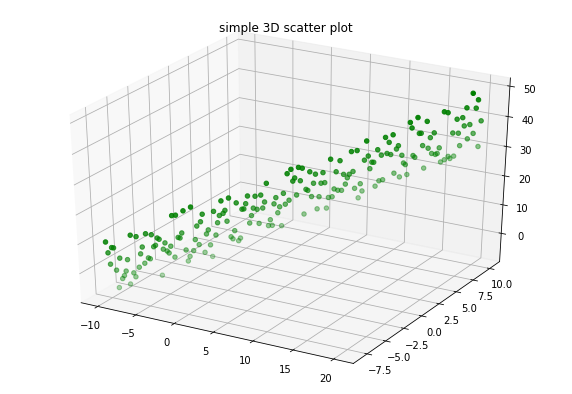

In [152]:
"""Generate fake data"""
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
c2 = 0.01
c1 = 1.3
c0 = 3.456
x1_in = np.linspace(-10.0, 20.2, 200.0)
x2_in = np.linspace(-8, 10.2, 200.0)

y_out =c1*x1_in + c2*x2_in +c0 + 20.0 * np.random.rand(len(x1_in))


# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x1_in, x2_in, y_out, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [153]:
import pandas as pd
x1 = np.array(x1_in)
x1_in
x2 = np.array(x2_in)
x2_in
y = np.array(y_out)
data = pd.DataFrame(zip(x1,x2,y),columns = ['x1', 'x2','y'])


data.head()

,x1,x2,y
0,-10.000000,-8.000000,10.059659
1,-9.848241,-7.908543,6.282968
2,-9.696482,-7.817085,2.322209
3,-9.544724,-7.725628,7.962014
4,-9.392965,-7.634171,7.800232


In [154]:
X = data.loc[:,['x1','x2']]
Y =data.iloc[:,2]
X.head()

,x1,x2
0,-10.000000,-8.000000
1,-9.848241,-7.908543
2,-9.696482,-7.817085
3,-9.544724,-7.725628
4,-9.392965,-7.634171


In [176]:
class Ridge:
    """Linear least squares with L2 regularization."""
    
    def __init__(self, lam):
        """Initialize a Ridge object.
        
        Args:
            lam: the regularization factor 
        """
        self._lambda = lam
        
    
    
    def fit(self, x_train, y_train):
        """Generate a fit for the data.
        
        Args:
            x_train: the input values of the training data
            y_train: the output values of the training data
        """
        X= x_train
        Y= y_train
        # compute the model coeff
        # theta = inv(xTx + lam*I) * xTy
        X['int'] = 1.0 #For the intercept term
        XTX = X.T.dot(X) 
        l= self._lambda * pd.DataFrame(np.identity(X.shape[1]))
        XTXl = pd.DataFrame(np.add.reduce([x.fillna(0).values for x in [XTX, l]]),columns = ['x1', 'x2','int'])
        XTXl_inv= pd.DataFrame(np.linalg.pinv(XTXl.values), XTXl.columns, XTXl.index)

        coeff = XTXl_inv.T.dot(X.T)
        self._coeff_hat = coeff.dot(Y)

In [216]:

"""Train using the custom Ridge class"""
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30)

#train_df, test_df = train_test_split(data, test_size=0.2, random_state=2018, shuffle=True )

lam = 0.1
ridge = Ridge(lam)
ridge.fit(x_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

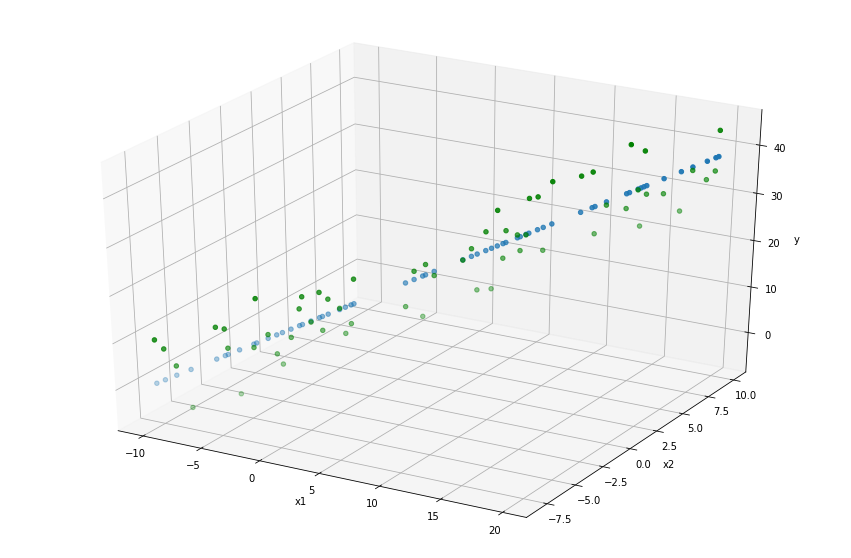

custom: 4.204100031260534, -4.878925235394459,3.756009440830194


In [217]:
"""Plot test data and model predictions"""

plt.figure()
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D(x_test.x1,x_test.x2, y_test, color = "green")
x1_sorted = np.sort(x_test['x1'].to_numpy())
x2_sorted = np.sort(x_test['x2'].to_numpy())
ax.scatter3D(x1_sorted,x2_sorted,
         ridge._coeff_hat[2] + ridge._coeff_hat[0]*x1_sorted+ ridge._coeff_hat[1]*x2_sorted ,
         '-r', label='custom')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


plt.show()

#print the coeff
print(f'custom: {ridge._coeff_hat[0]}, {ridge._coeff_hat[1]},{ridge._coeff_hat[2]}')

In [218]:
"""Train using Sklearn ridge model"""

from sklearn import linear_model

reg = linear_model.Ridge(alpha=lam)
reg.fit(x_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

<Figure size 432x288 with 0 Axes>

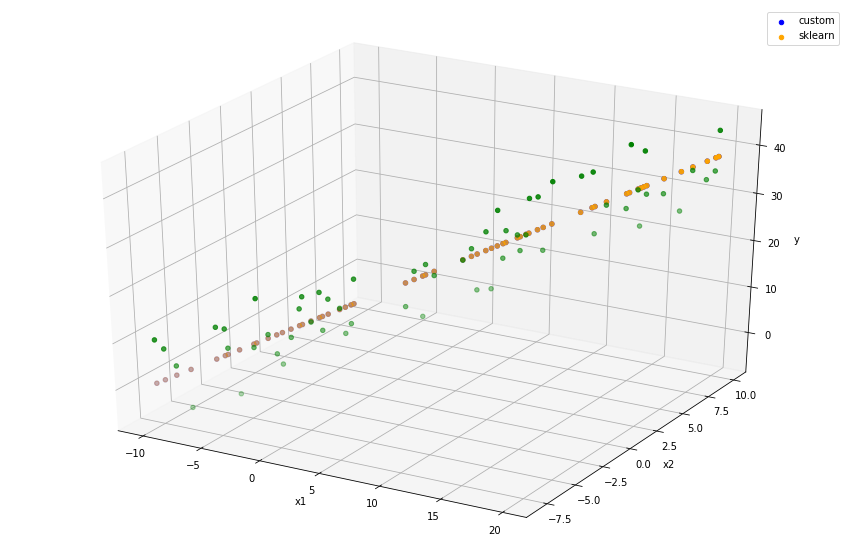

custom: 4.204100031260534, -4.878925235394459,3.756009440830194
sklearn: 14.490542803509374, 0.927002565568454,0.5586571752772649


In [219]:
"""Plot test data and model predictions"""
#comparison with Sklearn
plt.figure()
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
ax.scatter3D(x_test.x1,x_test.x2, y_test, color = "green")
x1_sorted = np.sort(x_test['x1'].to_numpy())
x2_sorted = np.sort(x_test['x2'].to_numpy())
ax.scatter3D(x1_sorted,x2_sorted,
         ridge._coeff_hat[2] + ridge._coeff_hat[0]*x1_sorted+ ridge._coeff_hat[1]*x2_sorted ,
         '-r', label='custom',color= 'blue')
ax.scatter3D(x1_sorted,x2_sorted,
         reg.intercept_  + reg.coef_[0]*x1_sorted+ reg.coef_[1]*x2_sorted ,
         '-r', label='sklearn', color='orange')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.legend()
plt.show()

#print the coeff
print(f'custom: {ridge._coeff_hat[0]}, {ridge._coeff_hat[1]},{ridge._coeff_hat[2]}')
print(f'sklearn: {reg.intercept_ }, {reg.coef_[0]},{reg.coef_[1]}')